In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# サポートベクトルマシン (SVM)
---
未知のデータに対する汎化能力が高いモデル。サンプルよりも特徴が多い場合に特に有効。基本的には線形分類器だが、カーネル法やカーネルトリックを用いて非線形分類可能。

In [2]:
iris = sns.load_dataset('iris')
iris['species'] = pd.Categorical(iris['species'])
x_clear = iris.loc[iris['species'].cat.codes < 2].values
x_ambiguous = iris.loc[iris['species'].cat.codes > 0].values
y = iris.iloc[:100, -1].cat.codes
print('iris')
display(iris.loc[iris['species'].cat.codes < 2,
                 ['sepal_length', 'sepal_width']])

iris


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
...,...,...
98,5.1,2.5
99,5.7,2.8


In [3]:
%matplotlib widget

In [4]:
from my_functions.svm import algorithm
algorithm.show(x_clear[:, :2], y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Dropdown(description='カーネル', options={'線形カーネル': 'linear', 'ガウシアンカーネル': 'rbf'}, value='li…

## 仕組み

### マージン最大化
---
データを2つのクラスに線形に分ける際に、決定境界から最も近いデータまでの距離 (マージン) を最大化するように境界線 (面) を設定することで、未知のデータが入ってきたときの汎化性能の高いモデルを構築する。

In [5]:
%matplotlib inline

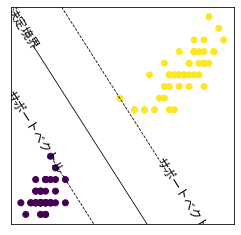

In [6]:
from my_functions.svm import hard_margin
hard_margin.show(x_clear[:, [2, 3]], y)

### ソフトマージン
---
実際のデータは綺麗に線形に分けられることは少ないので、パラメーター`C`によって誤分類の許容度を調整する。 (`C`が小さいほど誤分類を許容する)

In [7]:
from my_functions.svm import soft_margin
soft_margin.show(x_ambiguous[:, [2, 3]], y)

interactive(children=(FloatLogSlider(value=0.31622776601683794, continuous_update=False, description='$C$', ma…

### カーネル
---
詳しい中身は省略するが、データを高次元空間 (再生核ヒルベルト空間) に写像して、その空間で線形分離する超平面を探すカーネル法とその解を求めるためのカーネルトリックを用いて、非線形な決定境界を得る。

In [8]:
%matplotlib widget
%matplotlib widget

In [9]:
from my_functions.svm import kernel
kernel.show(x_ambiguous[:, [0, 1]], y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='$C$', max=2.0, min=-1.0,…

## Pythonでのサポートベクトルマシンの実行方法
---
`sklearn.svm.LinearSVC` (線形カーネルのみ) または`sklearn.svm.SVC`を使用する。

In [10]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

## 推薦図書
---
- [見て試してわかる機械学習アルゴリズムの仕組み 機械学習図鑑](https://www.amazon.co.jp/%E8%A6%8B%E3%81%A6%E8%A9%A6%E3%81%97%E3%81%A6%E3%82%8F%E3%81%8B%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%AE%E4%BB%95%E7%B5%84%E3%81%BF-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%9B%B3%E9%91%91-%E7%A7%8B%E5%BA%AD-%E4%BC%B8%E4%B9%9F/dp/4798155659/)
- [Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)
- [機械学習のエッセンス -実装しながら学ぶPython,数学,アルゴリズム-](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%82%A8%E3%83%83%E3%82%BB%E3%83%B3%E3%82%B9-%E5%AE%9F%E8%A3%85%E3%81%97%E3%81%AA%E3%81%8C%E3%82%89%E5%AD%A6%E3%81%B6Python-%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0-Machine-Learning/dp/4797393963/)